#  Préparation des données pour construire un modèle



<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/modelisation/0_preprocessing.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/modelisation/0_preprocessing.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/modelisation/0_preprocessing.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABmodelisation%200_preprocessing%C2%BB&security.allowlist.enabled=false)
<br>
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=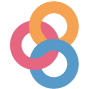)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/modelisation/0_preprocessing.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/modelisation/0_preprocessing.ipynb)
[![githubdev](https://open.vscode.dev/badges/open-in-vscode.svg)](https://github.dev/linogaliana/python-datascientist//__w/python-datascientist/python-datascientist/notebooks/course/modelisation/0_preprocessing.ipynb)

Ce chapitre utilise le jeu de données présenté dans l'[introduction
de cette partie](https://linogaliana-teaching.netlify.app/modelisation/):
les données de vote aux élections présidentielles US
croisées à des variables socio-démographiques. Le code 
est disponible [sur Github](https://github.com/linogaliana/python-datascientist/blob/master/content/course/modelisation/get_data.py) mais l'exercice 1 permet, à ceux qui le désirent, d'essayer de reproduire la constitution de la base de données. 

Le guide utilisateur de `scikit` est une référence précieuse,
à consulter régulièrement. La partie sur le *preprocessing* est
disponible [ici](https://scikit-learn.org/stable/modules/preprocessing.html).

Nous verrons dans le chapitre sur les *pipelines* comment industrialiser
ces étapes de pré-processing afin de se simplifier la vie pour appliquer
un modèle sur un jeu de données différent de celui sur lequel il a été estimé. 

# Construction de la base de données

Les sources étant éclatées, le code pour construire une base combinant toutes ces
sources est directement fourni. Le travail de construction d'une base unique
est un peu fastidieux mais il s'agit d'un bon exercice, que vous pouvez tenter,
pour [réviser `pandas`](#pandas)   :

**Exercice 1 : Importer les données des élections US** [OPTIONNEL]

1. Télécharger et importer le shapefile [depuis ce lien](https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_02_sldl_500k.zip)
2. Exclure les Etats suivants: "02", "69", "66", "78", "60", "72", "15"
3. Importer les résultats des élections depuis [ce lien](https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv)
4. Importer les bases disponibles sur le site de l'USDA en faisant attention à renommer les variables de code FIPS de manière identique
dans les 4 bases
5. *Merger* ces 4 bases dans une base unique de caractéristiques socio-économiques
6. *Merger* aux données électorales à partir du code FIPS
7. *Merger* au shapefile à partir du code FIPS. Faire attention aux 0 à gauche dans certains codes. Il est
recommandé d'utiliser la méthode `str.lstrip` pour les retirer
8. Importer les données des élections 2000 à 2016 à partir du [MIT Election Lab](https://electionlab.mit.edu/data)?
Les données peuvent être directement requêtées depuis l'url
<https://dataverse.harvard.edu/api/access/datafile/3641280?gbrecs=false>
9. Créer une variable `share` comptabilisant la part des votes pour chaque candidat. 
Ne garder que les colonnes `"year", "FIPS", "party", "candidatevotes", "share"`
10. Faire une conversion `long` to `wide` avec la méthode `pivot_table` pour garder une ligne
par comté x année avec en colonnes les résultats de chaque candidat dans cet état.
11. Merger à partir du code FIPS au reste de la base. 

Si vous ne faites pas l'exercice 1, pensez à charger les données en executant la fonction `get_data.py` :


In [ ]:
#!pip install geopandas

import requests

url = 'https://raw.githubusercontent.com/linogaliana/python-datascientist/master/content/course/modelisation/get_data.py'
r = requests.get(url, allow_redirects=True)
open('getdata.py', 'wb').write(r.content)

```
## 3585
```

In [ ]:
import getdata
votes = getdata.create_votes_dataframes()

```
## Error in py_call_impl(callable, dots$args, dots$keywords): AttributeError: module 'getdata' has no attribute 'create_votes_dataframes'
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

Ce code introduit une base nommée `votes` dans l'environnement. Il s'agit d'une
base rassemblant les différentes sources. Elle a l'aspect
suivant:



La carte choroplèthe suivante permet de visualiser rapidement les résultats
(l'Alaska et Hawaï ont été exclus). 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_dict = {'republican': '#FF0000', 'democrats': '#0000FF'}
#votes.plot(column = "winner", figsize = (12,12), c=votes['winner'].map(color_dict))

fig, ax = plt.subplots(figsize = (12,12))
grouped = votes.groupby('winner')

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'votes' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
for key, group in grouped:
    group.plot(ax=ax, column='winner', label=key, color=color_dict[key])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'grouped' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
plt.axis('off')

# plt.show()

```
## (0.0, 1.0, 0.0, 1.0)
```



```r
knitr::include_graphics("map_vote.png")
```

Les cartes choroplèthes peuvent donner une impression fallacieuse ayant servi 
de justification pour contester les résultats du vote. En effet, un biais
connu des représentations choroplèthes est qu'elles donnent une importance
visuelle excessive aux grands espaces. Or, ceux-ci sont souvent des espaces
peu denses et influencent donc moins la variable d'intérêt (en l'occurrence
le taux de vote en faveur des républicains/démocrates). Une représentation à 
privilégier pour ce type de phénomènes est les ronds proportionnels. 

Le [GIF "Land does not vote, people do"](https://www.core77.com/posts/90771/A-Great-Example-of-Better-Data-Visualization-This-Voting-Map-GIF)
qui avait eu un certain succès en 2020 propose un autre mode de visualisation.
La carte originale a probablement été construite avec `JavaScript`. Cependant,
on dispose avec `Python` pour répliquer, à faible coût, cette approche avec 
l'une des surcouches à JavaScript vue dans la partie [visualisation](#visualisation). 

En l'occurrence, on peut utiliser `plotly` pour tenir compte de la population:

La Figure a été obtenue avec le code suivant:


In [ ]:
import plotly
import plotly.graph_objects as go
import pandas as pd
import geopandas as gpd


centroids = votes.copy()

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'votes' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
centroids.geometry = centroids.centroid

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'centroids' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
centroids['size'] = centroids['CENSUS_2010_POP'] / 10000  # to get reasonable plotable number

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'centroids' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
color_dict = {"republican": '#FF0000', 'democrats': '#0000FF'}
centroids["winner"] =  np.where(centroids['votes_gop'] > centroids['votes_dem'], 'republican', 'democrats') 


```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'centroids' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
centroids['lon'] = centroids['geometry'].x

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'centroids' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
centroids['lat'] = centroids['geometry'].y

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'centroids' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
centroids = pd.DataFrame(centroids[["county_name",'lon','lat','winner', 'CENSUS_2010_POP',"state_name"]])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'centroids' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
groups = centroids.groupby('winner')

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'centroids' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
df = centroids.copy()

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'centroids' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
df['color'] = df['winner'].replace(color_dict)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): KeyError: 'winner'
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/frame.py", line 3505, in __getitem__
##     indexer = self.columns.get_loc(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3623, in get_loc
##     raise KeyError(key) from err
```

In [ ]:
df['size'] = df['CENSUS_2010_POP']/6000

```
## Error in py_call_impl(callable, dots$args, dots$keywords): KeyError: 'CENSUS_2010_POP'
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/frame.py", line 3505, in __getitem__
##     indexer = self.columns.get_loc(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3623, in get_loc
##     raise KeyError(key) from err
```

In [ ]:
df['text'] = df['CENSUS_2010_POP'].astype(int).apply(lambda x: '<br>Population: {:,} people'.format(x))

```
## Error in py_call_impl(callable, dots$args, dots$keywords): KeyError: 'CENSUS_2010_POP'
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/frame.py", line 3505, in __getitem__
##     indexer = self.columns.get_loc(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3623, in get_loc
##     raise KeyError(key) from err
```

In [ ]:
df['hover'] = df['county_name'].astype(str) +  df['state_name'].apply(lambda x: ' ({}) '.format(x)) + df['text']

```
## Error in py_call_impl(callable, dots$args, dots$keywords): KeyError: 'county_name'
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/frame.py", line 3505, in __getitem__
##     indexer = self.columns.get_loc(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3623, in get_loc
##     raise KeyError(key) from err
```

In [ ]:
fig_plotly = go.Figure(data=go.Scattergeo(
    locationmode = 'USA-states',
    lon=df["lon"], lat=df["lat"],
    text = df["hover"],
    mode = 'markers',
    marker_color = df["color"],
    marker_size = df['size'],
    hoverinfo="text"
    ))

```
## Error in py_call_impl(callable, dots$args, dots$keywords): KeyError: 'lon'
## 
## Detailed traceback: 
##   File "<string>", line 3, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/frame.py", line 3505, in __getitem__
##     indexer = self.columns.get_loc(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3623, in get_loc
##     raise KeyError(key) from err
```

In [ ]:
fig_plotly.update_traces(
  marker = {'opacity': 0.5, 'line_color': 'rgb(40,40,40)', 'line_width': 0.5, 'sizemode': 'area'}
)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'fig_plotly' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
fig_plotly.update_layout(
        title_text = "Reproduction of the \"Acres don't vote, people do\" map <br>(Click legend to toggle traces)",
        showlegend = True,
        geo = {"scope": 'usa', "landcolor": 'rgb(217, 217, 217)'}
    )

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'fig_plotly' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```





## Explorer la structure des données

La première étape nécessaire à suivre avant de se lancer dans la modélisation
est de déterminer les variables à inclure dans le modèle.

Les fonctionnalités de `pandas` sont, à ce niveau, suffisantes pour explorer des structures simples. Néanmoins, lorsqu'on est face à un jeu de données présentant de nombreuses variables explicatives (*features* en machine learning, *covariates* en économétrie), il est souvent judicieux d'avoir une première étape de sélection de variable, ce que nous verrons par la suite dans la [partie dédiée](https://linogaliana-teaching.netlify.app/lasso/).  

Avant d'être en mesure de sélectionner le meilleur ensemble de variables explicatives, nous allons en prendre un nombre restreint et arbitraire. La première tâche est de représenter les relations entre les données, notamment la relation des variables explicatives à la variable dépendante (le score du parti républicain) ainsi que les relations entre les variables explicatives. 

**Exercice 2 : Regarder les corrélations entre les variables**

1. Créer un DataFrame `df2` plus petit avec les variables `winner` et 
`votes_gop`, `Unemployment_rate_2019`,
`Median_Household_Income_2019`,
`Percent of adults with less than a high school diploma, 2015-19`,
`Percent of adults with a bachelor's degree or higher, 2015-19`


In [ ]:
# 1. Créer le data.frame df2.
df2 = votes.set_index("GEOID").loc[: , ["winner", "votes_gop",
          'Unemployment_rate_2019', 'Median_Household_Income_2019',
          'Percent of adults with less than a high school diploma, 2015-19',
          "Percent of adults with a bachelor's degree or higher, 2015-19"]]

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'votes' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

2. Représenter grâce à un graphique la matrice de corrélation avec `heatmap` de `seaborn`.


In [ ]:
# 2. Matrice de corrélation graphique
sns.heatmap(df2.drop("winner", axis = 1).corr(), cmap='coolwarm', annot=True, fmt=".2f")

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'df2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
plt.savefig('correlation_matrix2.png', bbox_inches='tight')

## Construction directement avec pandas également possible
df2.drop("winner", axis = 1).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'df2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

Elle aura l'aspect suivant:

3. Choisir quelques variables (pas plus de 4 ou 5) et représenter une matrice de nuages de points


In [ ]:
# 3. Matrice de nuages de points
ax = pd.plotting.scatter_matrix(df2, figsize = (15,15))

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'df2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
ax
plt.savefig('scatter_matrix.png', bbox_inches='tight')

4. (optionnel) Refaire ces figures avec `plotly` qui offre également la possibilité de faire une matrice de corrélation. Le résultat devrait ressembler au graphique suivant :
 


In [ ]:
# 4. Matrice de corélation avec plotly
import plotly
import plotly.express as px
htmlsnip2 = px.scatter_matrix(df2)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'df2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
htmlsnip2.update_traces(diagonal_visible=False)
# Pour inclusion dans le site web

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'htmlsnip2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
htmlsnip2.write_json("scatter_matrix.json")

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'htmlsnip2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```




## Transformer les données

Les différences d'échelle ou de distribution entre les variables peuvent 
diverger des hypothèses sous-jacentes dans les modèles.

Par exemple, dans le cadre
de la régression linéaire, les variables catégorielles ne sont pas traitées à la même
enseigne que les variables ayant valeur dans $\mathbb{R}$. Une variable
discrète (prenant un nombre fini de valeurs) devra être transformées en suite de
variables 0/1 par rapport à une modalité de référence pour être en adéquation
avec les hypothèses de la régression linéaire. On appelle ce type de transformation
*one-hot encoding*, sur lequel nous reviendrons. Il s'agit d'une transformation,
parmi d'autres, disponibles dans `scikit` pour mettre en adéquation un jeu de
données et des hypothèses mathématiques. 

L'ensemble de ces tâches s'appelle le *preprocessing*. L'un des intérêts
d'utiliser `scikit` est qu'on peut considérer qu'une tâche de preprocessing
est une tâche d'apprentissage (on apprend des paramètres d'une structure 
de données) qui est réutilisable pour un jeu de données à la structure
similaire:


### Standardisation

La standardisation consiste à transformer des données pour que la distribution empirique suive une loi $\mathcal{N}(0,1)$. Pour être performants, la plupart des modèles de machine learning nécessitent souvent d'avoir des données dans cette distribution.

Pour un statisticien, le terme `normalization` dans le vocable `scikit` peut avoir un sens contre-intuitif. On s'attendrait à ce que la normalisation consiste à transformer une variable de manière à ce que $X \sim \mathcal{N}(0,1)$. C'est, en fait, la **standardisation** en `scikit`. 

La **normalisation** consiste à modifier les données de manière à avoir une norme unitaire. La raison est expliquée plus bas.

**Exercice 3: Standardisation**

1. Standardiser la variable `Median_Household_Income_2019` (ne pas écraser les valeurs !) et regarder l'histogramme avant/après normalisation.


In [ ]:
# 1. Standardisation de Median_Household_Income_2019 et histogramme
from sklearn import preprocessing
df2['y_standard'] = preprocessing.scale(df2['Median_Household_Income_2019'])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'df2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
f, axes = plt.subplots(2, figsize=(10, 10))
sns.distplot(df2["Median_Household_Income_2019"] , color="skyblue", ax=axes[0])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'df2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
sns.distplot(df2["y_standard"] , color="olive", ax=axes[1])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'df2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
plt.savefig('standardisation.png', bbox_inches='tight')

*Note : On obtient bien une distribution centrée à zéro et on pourrait vérifier que la variance empirique soit bien égale à 1. On pourrait aussi vérifier que ceci est vrai également quand on transforme plusieurs colonnes à la fois.*

2. Créer `scaler`, un `Transformer` que vous construisez sur les 1000 premières lignes de votre DataFrame. Vérifier la moyenne et l'écart-type de chaque colonne sur ces mêmes observations.


In [ ]:
# 2. Créer un scaler
df2 = df2.drop("winner", axis = 1)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'df2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
scaler = preprocessing.StandardScaler().fit(df2.head(1000))

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'df2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
scaler.transform(df2.head(1000))

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scaler' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
print("Moyenne de chaque variable sur 1000 premières observations")

```
## Moyenne de chaque variable sur 1000 premières observations
```

In [ ]:
scaler.transform(df2.head(1000)).mean(axis=0)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scaler' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
print("Ecart-type de chaque variable sur 1000 premières observations")

```
## Ecart-type de chaque variable sur 1000 premières observations
```

In [ ]:
scaler.transform(df2.head(1000)).std(axis=0)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scaler' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

*Note : Les paramètres qui seront utilisés pour une standardisation ultérieure sont stockés dans les attributs `.mean_` et `.scale_`*


In [ ]:
scaler.mean_

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scaler' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
scaler.scale_

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scaler' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

On peut voir ces attributs comme des paramètres entraînés sur un certain jeu de
données et qu'on peut réutiliser sur un autre, à condition que les
dimensions coïncident.

3. Appliquer `scaler` sur les autres lignes du DataFrame et comparer les distributions obtenues de la variable `Median_Household_Income_2019`.


In [ ]:
# 3. Appliquer le scaler à toutes les autres lignes
X1 = scaler.transform(df2.head(1000))

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scaler' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
X2 = scaler.transform(df2[1000:])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scaler' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
col_pos = df2.columns.get_loc("Median_Household_Income_2019")
# X2.mean(axis = 0)
# X2.std(axis = 0)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'df2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
f, axes = plt.subplots(2, figsize=(10, 10))
sns.distplot(X1[:,col_pos] , color="skyblue", ax=axes[0])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'col_pos' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
sns.distplot(X2[:,col_pos] , color="olive", ax=axes[1])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'col_pos' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
plt.savefig('standardisation2.png', bbox_inches='tight')

*Note : Une fois appliqués à un autre `DataFrame`, on peut remarquer que la distribution n'est pas exactement centrée-réduite dans le `DataFrame` sur lequel les paramètres n'ont pas été estimés. C'est normal, l'échantillon initial n'était pas aléatoire, les moyennes et variances de cet échantillon n'ont pas de raison de coïncider avec les moments de l'échantillon complet.*








 



### Normalisation

La **normalisation** est l'action de transformer les données de manière à obtenir une norme ($\mathcal{l}_1$ ou $\mathcal{l}_2$) unitaire. Autrement dit, avec la norme adéquate, la somme des éléments est égale à 1. Par défaut, la norme est dans $\mathcal{l}_2$. Cette transformation est particulièrement utilisée en classification de texte ou pour effectuer du *clustering*.

**Exercice 4 : Normalisation**

1. Normaliser la variable `Median_Household_Income_2019` (ne pas écraser les valeurs !) et regarder l'histogramme avant/après normalisation.


In [ ]:
# 1. Normalisation de Median_Household_Income_2019 et histogrammes
scaler = preprocessing.Normalizer().fit(df2.dropna(how = "any").head(1000))

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'df2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
X1 = scaler.transform(df2.dropna(how = "any").head(1000))

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scaler' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
f, axes = plt.subplots(2, figsize=(10, 10))
sns.distplot(df2["Median_Household_Income_2019"] , color="skyblue", ax=axes[0])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'df2' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
sns.distplot(X1[:,col_pos] , color="olive", ax=axes[1])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'col_pos' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
plt.savefig('normalisation.png', bbox_inches='tight')

2. Vérifier que la norme $\mathcal{l}_2$ est bien égale à 1.


In [ ]:
# 2. Vérification de la norme L2
np.sqrt(np.sum(X1**2, axis=1))[:5] # L2-norm

```
## array([[0.94463078, 0.93552084],
##        [0.28326202, 0.18884141],
##        [0.58807109, 0.81537901],
##        [0.74223529, 0.60029969],
##        [0.41682553, 0.22173429]])
```





` preprocessing.Normalizer` n'accepte pas les valeurs manquantes, alors que `preprocessing.StandardScaler()` s'en accomode (dans la version `0.22` de scikit). Pour pouvoir aisément appliquer le *normalizer*, il faut

* retirer les valeurs manquantes du DataFrame avec la méthode `dropna`: `df.dropna(how = "any")`;
* ou les imputer avec un modèle adéquat. [`scikit` permet de le faire](https://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values).

### Encodage des valeurs catégorielles

Les données catégorielles doivent être recodées sous forme de valeurs numériques pour être intégrables dans le cadre d'un modèle. Cela peut être fait de plusieurs manières :

* `LabelEncoder`: transforme un vecteur `["a","b","c"]` en vecteur numérique `[0,1,2]`. Cette approche a l'inconvénient d'introduire un ordre dans les modalités, ce qui n'est pas toujours souhaitable

* `OrdinalEncoder`: une version généralisée du `LabelEncoder` qui a vocation à s'appliquer sur des matrices ($X$), alors que `LabelEncoder` est plutôt pour un vecteur ($y$)

* `pandas.get_dummies` effectue une opération de *dummy expansion*. Un vecteur de taille *n* avec *K* catégories sera transformé en matrice de taille $n \times K$ pour lequel chaque colonne sera une variable *dummy* pour la modalité *k*. Il y a ici $K$ modalités et il y a donc multicollinéarité. Avec une régression linéaire avec constante, il convient de retirer une modalité avant l'estimation.

* `OneHotEncoder` est une version généralisée (et optimisée) de la *dummy expansion*. Il a plutôt vocation à s'appliquer sur les *features* ($X$) du modèle

**Exercice 5 : Encoder des variables catégorielles**

1. Créer `df` qui conserve uniquement les variables `state_name` et `county_name` dans `votes`.


In [ ]:
#1. Création de df
df = votes[["state_name",'county_name']]

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'votes' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

2. Appliquer à `state_name` un `LabelEncoder`


In [ ]:
#2. Appliquer un LabelEncoder à stat_name
label_enc = preprocessing.LabelEncoder().fit(df['state_name'])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): KeyError: 'state_name'
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/frame.py", line 3505, in __getitem__
##     indexer = self.columns.get_loc(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3623, in get_loc
##     raise KeyError(key) from err
```

In [ ]:
np.column_stack((label_enc.transform(df['state_name']),df['state_name']))

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'label_enc' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

*Note : Le résultat du label encoding est relativement intuitif, notamment quand on le met en relation avec le vecteur initial.*

3. Regarder la *dummy expansion* de `state_name`


In [ ]:
# 3. dummy expansion de state_name
pd.get_dummies(df['state_name'])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): KeyError: 'state_name'
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/frame.py", line 3505, in __getitem__
##     indexer = self.columns.get_loc(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3623, in get_loc
##     raise KeyError(key) from err
```

4. Appliquer un `OrdinalEncoder` à `df[['state_name', 'county_name']]`



In [ ]:
# 4. OrdinalEncoder
ord_enc = preprocessing.OrdinalEncoder().fit(df)
# ord_enc.transform(df[['state', 'county']])
ord_enc.transform(df)[:,0]

```
## array([2., 3., 4., 1., 0., 5.])
```

*Note : Le résultat du *ordinal encoding* est cohérent avec celui du label encoding*

5. Appliquer un `OneHotEncoder` à `df[['state_name', 'county_name']]`


In [ ]:
# 5. OneHotEncoder
onehot_enc = preprocessing.OneHotEncoder().fit(df)
onehot_enc.transform(df)

```
## <6x6 sparse matrix of type '<class 'numpy.float64'>'
## 	with 6 stored elements in Compressed Sparse Row format>
```

*Note : `scikit` optimise l'objet nécessaire pour stocker le résultat d'un modèle de transformation. Par exemple, le résultat de l'encoding One Hot est un objet très volumineux. Dans ce cas, scikit utilise une matrice Sparse.*

